In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys, joblib, json

In [6]:
data = {}
for i in glob('*/*results.json'):
    with open(i) as f:
       data[i.split('/')[0]]=json.load(f)

with open('state_vector/IQP_Full-Pauli-CRZ/IQP_Full-Pauli-CRZ_results.json') as f:
   data['state_vector']=json.load(f)

In [14]:
data_df = pd.DataFrame.from_dict(data).T.reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test'])

In [18]:
data_df.sort_values(by='value')

,index,variable,value
4,MITIQ_ZNE_Linear,R2_test,0.961881
0,MITIQ_ZNE_Linear,R2_train,0.965126
5,without,R2_test,0.981081
6,TREX,R2_test,0.981286
1,without,R2_train,0.983399
2,TREX,R2_train,0.984826
3,state_vector,R2_train,0.988265
7,state_vector,R2_test,0.989123


<Axes: xlabel='index', ylabel='value'>

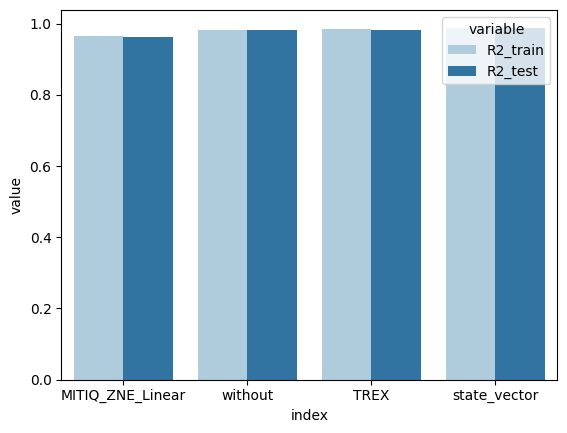

In [16]:
sns.barplot(data=data_df,x='index',y='value',hue='variable',palette=sns.color_palette('Paired',2))